**2D Conv for MNIST**

https://github.com/pytorch/examples/blob/master/mnist/main.py

In [14]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [9]:
device = 'cpu'
def train(log_interval, model, train_loader, optimizer, epoch):
    model.train()
    losses = list()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        # log loss
        losses.append(loss.item())
        
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    return losses

In [10]:
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [11]:
batch_size = 64
test_batch_size = 1000
lr = 0.01
momentum = 0.5
epochs = 10

log_interval = 10

train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('/Users/esaliya/sali/data/mnist', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True, **{})

test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('/Users/esaliya/sali/data/mnist', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=test_batch_size, shuffle=True, **{})


model = Net()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
losses = []
for epoch in range(1, epochs + 1):
    losses.append(train(log_interval, model, train_loader, optimizer, epoch))
    test(model, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.356283
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.309957
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.270805
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.280886
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.296018
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.275765
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.270281
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.227424
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.210511
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.189561
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.184314
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.077798
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.146521
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.064015
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.921316
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.882071
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.748596
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.577919
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.502208
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.374255
Train Epoch: 1 [12800/60000 (

Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.295145
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.362894
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.235513
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.204393
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.294526
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.459077
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.206894
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.303657
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.363273
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.475565
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.436566
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.354261
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.300852
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.382501
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.221011
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.382881
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.284887
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.434401
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.311064
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.418981


Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.338321
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.264724
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.467349
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.240410
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.193731
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.257923
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.213958
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.217369
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.277854
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.386701
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.353056
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.469375
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.144181
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.503869
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.230408
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.229821
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.331595
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.141916
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.334282
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.299921


Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.436464
Train Epoch: 6 [13440/60000 (22%)]	Loss: 0.272441
Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.193476
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.244315
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.185974
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.102069
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.311446
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.253639
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.259691
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.203995
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.411841
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.116378
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.160642
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.170084
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.028829
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.217095
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.181236
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.282512
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.450741
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.183637


Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.145713
Train Epoch: 7 [58240/60000 (97%)]	Loss: 0.101537
Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.369925
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.069199

Test set: Average loss: 0.0674, Accuracy: 9780/10000 (98%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.192787
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.346548
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.104923
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.159673
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.281069
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.175383
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.174265
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.234881
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.303474
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.242175
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.145006
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.167662
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.422768
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.213531
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.148837
Train Epoch: 8 [9

Train Epoch: 9 [41600/60000 (69%)]	Loss: 0.237801
Train Epoch: 9 [42240/60000 (70%)]	Loss: 0.130330
Train Epoch: 9 [42880/60000 (71%)]	Loss: 0.224130
Train Epoch: 9 [43520/60000 (72%)]	Loss: 0.266904
Train Epoch: 9 [44160/60000 (74%)]	Loss: 0.184026
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.068145
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.226343
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.219958
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.227778
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.318337
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.099005
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.187479
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.270817
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.143646
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.197741
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.182462
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.284335
Train Epoch: 9 [52480/60000 (87%)]	Loss: 0.195667
Train Epoch: 9 [53120/60000 (88%)]	Loss: 0.258617
Train Epoch: 9 [53760/60000 (90%)]	Loss: 0.277719


torch.Size([28, 28])
torch.Size([])


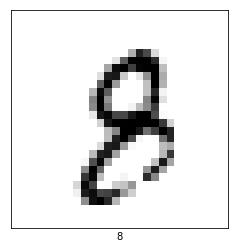

In [39]:
train_iter = iter(train_loader)
x,l = train_iter.next()
digit = x[0,0]
label = l[0]
print(digit.shape)
print(label.shape)

import matplotlib.pyplot as plt
import numpy as np
plt.xticks([])
plt.yticks([])
#plt.imshow(digit.numpy(), cmap='gray')
plt.imshow(digit.numpy(), cmap=plt.cm.binary)
plt.xlabel(label.item())
plt.show()


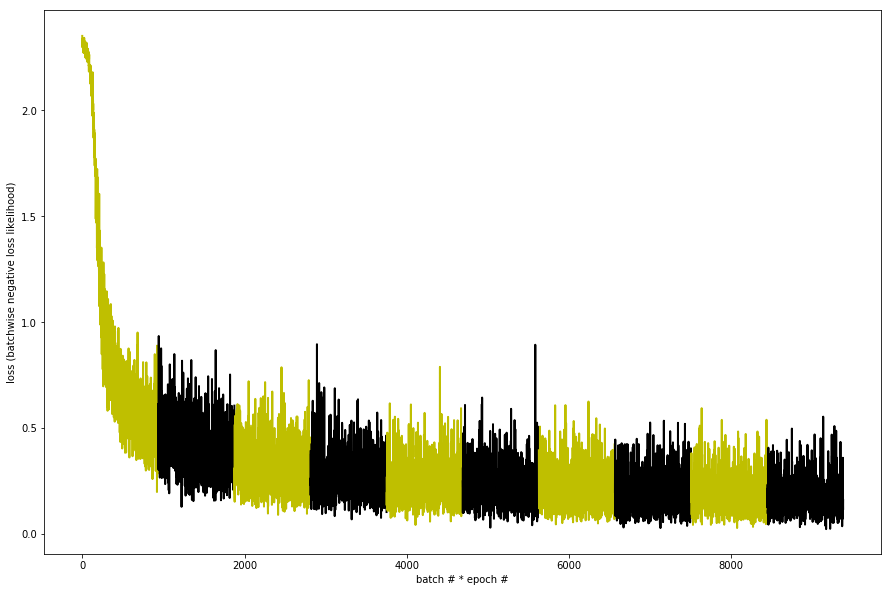

In [15]:
batches = len(losses[0])
# print("N:", N, "bs:", batch_size, "batches:", batches)
# print("len(losses)")
# for loss in losses:
#     print(len(loss))

x = np.arange(epochs * batches)
y = np.asarray([item for sublist in losses for item in sublist])
# print(x.shape, y.shape)
      
t = np.array([x, y]).T

segments = [np.array(
    t[i*batches:(i+1)*batches]) 
            for i in range(epochs)]
colors = ['y' if i % 2 == 0 else 'black' for i in range(epochs)]

# print(len(segments))
# print(segments[0].shape)

lc = LineCollection(segments, colors=colors, linewidths=2)
fig, ax = plt.subplots(figsize=(15,10))
ax.add_collection(lc)
ax.autoscale()
ax.set_xlabel("batch # * epoch #")
ax.set_ylabel("loss (batchwise negative loss likelihood)")
# ax.margins(0.1)
plt.show()
